<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.521338,74.824954,78.809403,-4.688892,189.466804,193.290556,-3.823752
1,0.0,1.0,83.071893,54.342258,47.327919,-0.351592,194.390479,195.685408,-1.294930
2,0.0,2.0,61.647328,98.295626,52.699081,0.877454,223.519489,221.660903,1.858586
3,0.0,3.0,95.497720,73.383122,64.484715,-6.134226,237.231331,243.769479,-6.538149
4,0.0,4.0,61.550856,43.022374,34.175662,0.149875,148.898767,149.782674,-0.883908
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,84.194408,76.071436,27.579794,2.790671,200.636309,198.175309,2.461000
119996,999.0,116.0,57.599262,52.319335,45.003362,5.044279,169.966239,165.829633,4.136606
119997,999.0,117.0,37.203380,53.376133,93.684096,4.536767,198.800375,195.041560,3.758815
119998,999.0,118.0,56.586919,38.478720,54.917900,0.619843,160.603382,160.902045,-0.298663


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.521338,74.824954,78.809403,-4.688892,189.466804,193.290556,-3.823752
1,0.0,1.0,83.071893,54.342258,47.327919,-0.351592,194.390479,195.685408,-1.294930
2,0.0,2.0,61.647328,98.295626,52.699081,0.877454,223.519489,221.660903,1.858586
3,0.0,3.0,95.497720,73.383122,64.484715,-6.134226,237.231331,243.769479,-6.538149
4,0.0,4.0,61.550856,43.022374,34.175662,0.149875,148.898767,149.782674,-0.883908
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,84.194408,76.071436,27.579794,2.790671,200.636309,198.175309,2.461000
119996,999.0,116.0,57.599262,52.319335,45.003362,5.044279,169.966239,165.829633,4.136606
119997,999.0,117.0,37.203380,53.376133,93.684096,4.536767,198.800375,195.041560,3.758815
119998,999.0,118.0,56.586919,38.478720,54.917900,0.619843,160.603382,160.902045,-0.298663


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    30.521338  74.824954  78.809403  ...  189.466804  193.290556 -3.823752
      1.0    83.071893  54.342258  47.327919  ...  194.390479  195.685408 -1.294930
      2.0    61.647328  98.295626  52.699081  ...  223.519489  221.660903  1.858586
      3.0    95.497720  73.383122  64.484715  ...  237.231331  243.769479 -6.538149
      4.0    61.550856  43.022374  34.175662  ...  148.898767  149.782674 -0.883908
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  84.194408  76.071436  27.579794  ...  200.636309  198.175309  2.461000
      116.0  57.599262  52.319335  45.003362  ...  169.966239  165.829633  4.136606
      117.0  37.203380  53.376133  93.684096  ...  198.800375  195.041560  3.758815
      118.0  56.586919  38.478720  54.917900  ...  160.603382  160.902045 -0.298663
      119.0  89.670679  38.090004  32.892896  ...  179.203459  171.088510  8.114949

[120000 rows x 7 columns]

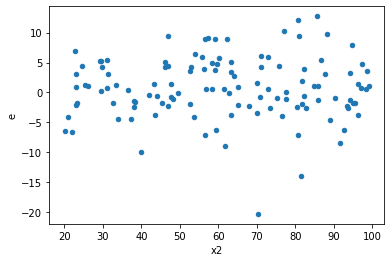

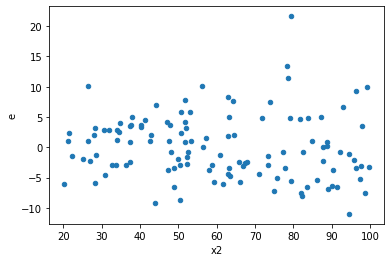

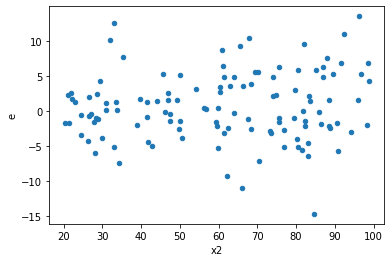

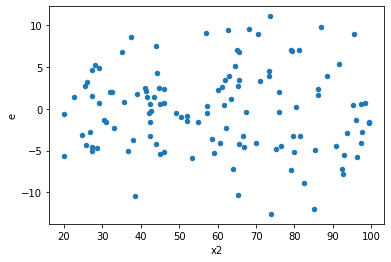

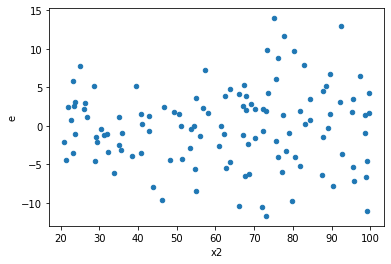

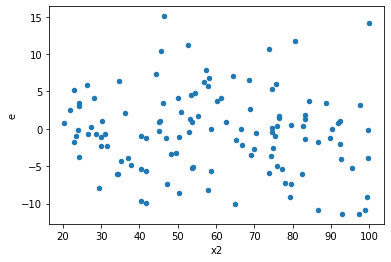

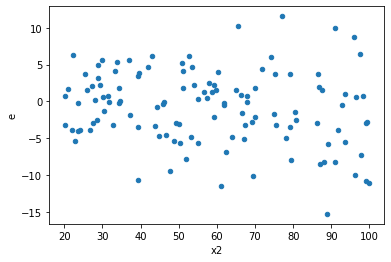

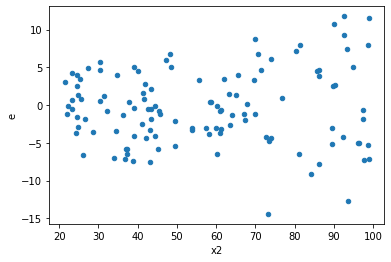

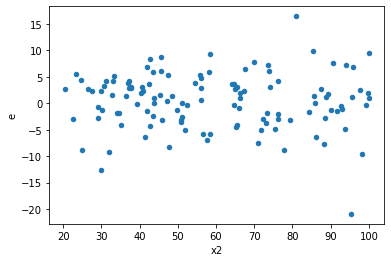

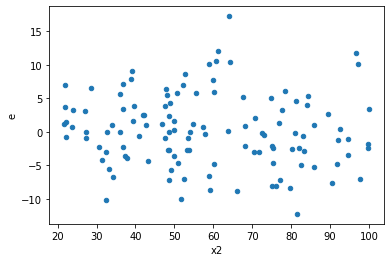

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,65.0,49.0,1791.99774501398,1590.0507996975784,27.56919607713815,32.45001632035874,1.1770389034763342,0.5542748362633834,0.7228625818683083,0.2771374181316917,Reject005=1 : Homoscedasticity
2.0,58.0,56.0,1598.9108514370298,1700.6795797749662,27.56742847305224,30.369278210267254,1.1016362385760385,0.7173392542507615,0.6413303728746192,0.35866962712538075,Reject005=1 : Homoscedasticity
4.0,63.0,51.0,1364.3537930732655,2278.1305409883958,21.656409413861358,44.66922629389011,2.0626330727428535,0.008398079769045497,0.9958009601154773,0.004199039884522748,Reject005=0 : Heteroscedasticity
7.0,62.0,52.0,1332.8454151368728,1366.8640425836522,21.497506695756012,26.285846972762542,1.222739331810597,0.45793684590018646,0.7710315770499068,0.22896842295009323,Reject005=1 : Homoscedasticity
9.0,55.0,59.0,1089.6499974049773,2003.757958565971,19.81181813463595,33.96199929772832,1.7142293083315943,0.04320171874620793,0.978399140626896,0.021600859373103964,Reject005=0 : Heteroscedasticity
10.0,42.0,72.0,1094.9981756946959,1996.294350540638,26.071385135587995,27.72631042417553,1.0634766921657923,0.8042447387983045,0.5978776306008478,0.40212236939915225,Reject005=1 : Homoscedasticity
11.0,47.0,67.0,1188.6129906820636,1910.4215538522303,25.289638099618376,28.513754535107914,1.1274876462363528,0.6446820296411859,0.677658985179407,0.32234101482059296,Reject005=1 : Homoscedasticity
12.0,56.0,58.0,1090.639723884073,1364.0384529221362,19.47570935507273,23.517904360726487,1.2075505919686005,0.47762802156573514,0.7611859892171324,0.23881401078286757,Reject005=1 : Homoscedasticity
13.0,46.0,68.0,1086.1143942449446,1684.0301120987974,23.611182483585754,24.765148707335257,1.0488737158569559,0.8464657231441084,0.5767671384279458,0.4232328615720542,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,62.0,52.0,1150.0291278862333,923.718491596449,18.54885690139086,17.763817146085557,0.957677189517461,0.8651728910129858,Reject005=1 : Homoscedasticity
1.0,65.0,49.0,1791.99774501398,1590.0507996975784,27.56919607713815,32.45001632035874,1.1770389034763342,0.5542748362633834,Reject005=1 : Homoscedasticity
2.0,58.0,56.0,1598.9108514370298,1700.6795797749662,27.56742847305224,30.369278210267254,1.1016362385760385,0.7173392542507615,Reject005=1 : Homoscedasticity
3.0,52.0,62.0,2447.3497218282137,1548.6108437585046,47.064417727465646,24.97759425416943,0.5307107887492915,0.02013419480714057,Reject005=0 : Heteroscedasticity
4.0,63.0,51.0,1364.3537930732655,2278.1305409883958,21.656409413861358,44.66922629389011,2.0626330727428535,0.008398079769045497,Reject005=0 : Heteroscedasticity
5.0,57.0,57.0,1888.7616598764305,1017.5116046984245,33.136169471516325,17.851080784182887,0.5387189004911259,0.021069498970659455,Reject005=0 : Heteroscedasticity
6.0,53.0,61.0,1499.6468200487666,1090.5185895997774,28.29522301978805,17.877353927865204,0.6318152684417017,0.0893630494743719,Reject005=1 : Homoscedasticity
7.0,62.0,52.0,1332.8454151368728,1366.8640425836522,21.497506695756012,26.285846972762542,1.222739331810597,0.45793684590018646,Reject005=1 : Homoscedasticity
8.0,66.0,48.0,1923.6703848388674,910.0742338767175,29.146520982407083,18.959879872431614,0.6505023321265632,0.10479915200836877,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      759
Reject005=0 : Heteroscedasticity    241
Name: Result_test, dtype: int64